In [ ]:
!pip install rasterio -q #-q é para nao aparecer a instalação
!pip install spectral -q

In [ ]:
# Bibliotecas

import rasterio as rio
from spectral import imshow #para ver rgb
import numpy as np
import matplotlib.pyplot as plt
import glob #para caminhos

In [ ]:
#armazenando caminhos

files_list = list(glob.glob('/content/drive/MyDrive/PDISAR/ALOS/*.tif'))

In [ ]:
print(files_list)

['/content/drive/MyDrive/PDISAR/ALOS/ALOS_VV.tif', '/content/drive/MyDrive/PDISAR/ALOS/ALOS_VH.tif', '/content/drive/MyDrive/PDISAR/ALOS/ALOS_HV.tif', '/content/drive/MyDrive/PDISAR/ALOS/ALOS_HH.tif']


In [ ]:
print(files_list[0])#caso queira listar so o primeiro arquivo da pasta do drive

/content/drive/MyDrive/PDISAR/ALOS/ALOS_VV.tif


In [ ]:
#Leitura das imagens e conversão para array
# with sigfnica q vai executar o processo e tira da memoria
# se fizesse src1 = rio.open(files_list[0]) ficaria na memoria exigindo mais

with rio.open(files_list[0]) as src1:
  VV = src1.read(1)
with rio.open(files_list[1]) as src1:
  VH = src1.read(1)
with rio.open(files_list[2]) as src1:
  HV = src1.read(1)
with rio.open(files_list[3]) as src1:
  HH = src1.read(1)

In [ ]:
type(VV)

numpy.ndarray

In [ ]:
VV.shape #para ver o tamanho da matriz

(1767, 1909)

In [ ]:
#empilhando os dados (stacking)
#o d de dstack é de profundidade
# tem vstack e hstack tbem
stack =  np.dstack([VV, VH, HV, HH])

In [ ]:
stack.shape

(1767, 1909, 4)

/usr/local/lib/python3.10/dist-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  (0, 1, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.00012343960406724364, 893.5794067382812]
    G: [6.285530253080651e-05, 272.17169189453125]
    B: [5.420073284767568e-05, 208.02943420410156]

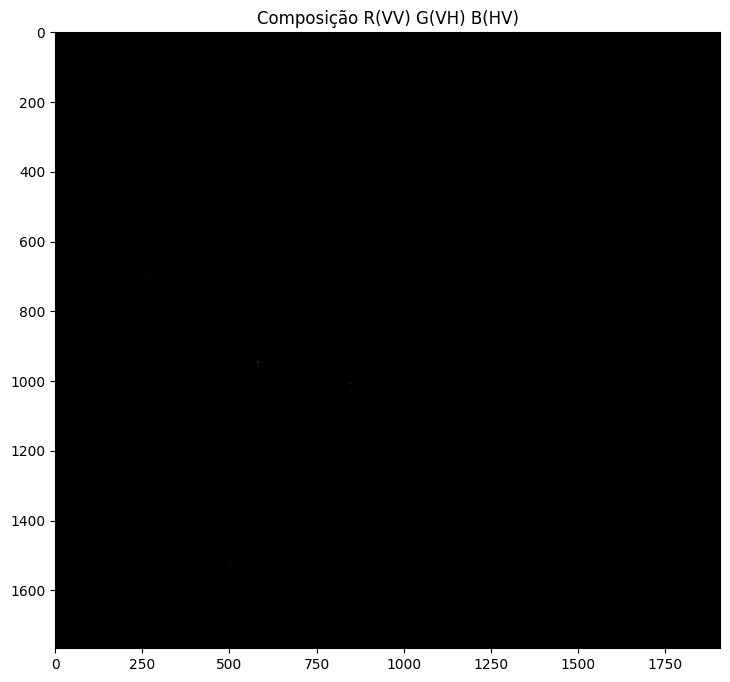

In [ ]:
#visualização composição colorido sem strech
imshow(stack, bands=(0,1,2), figsize=(12,8), title="Composição R(VV) G(VH) B(HV)")

ImageView object:
  Display bands       :  (0, 1, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.010177710093557835, 0.7235181331634521]
    G: [0.0016453894786536694, 0.14448703825473785]
    B: [0.001498111174441874, 0.14675019681453705]

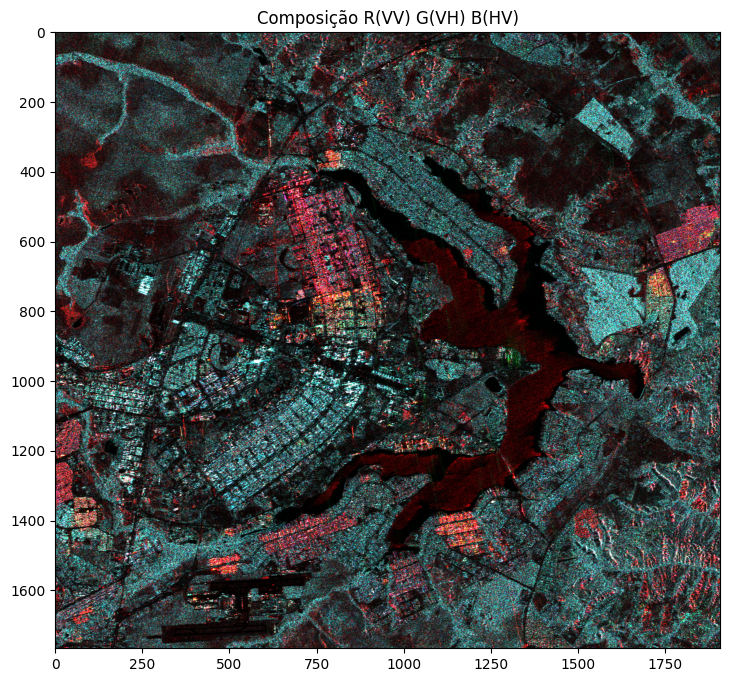

In [ ]:
#visualização composição colorido com strech
imshow(stack, bands=(0,1,2), figsize=(12,8), title="Composição R(VV) G(VH) B(HV)",
       stretch=(0.02, 0.98))

ImageView object:
  Display bands       :  (0, 1, 3)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.010177710093557835, 0.7235181331634521]
    G: [0.0016453894786536694, 0.14448703825473785]
    B: [0.01291745901107788, 1.3298540115356445]

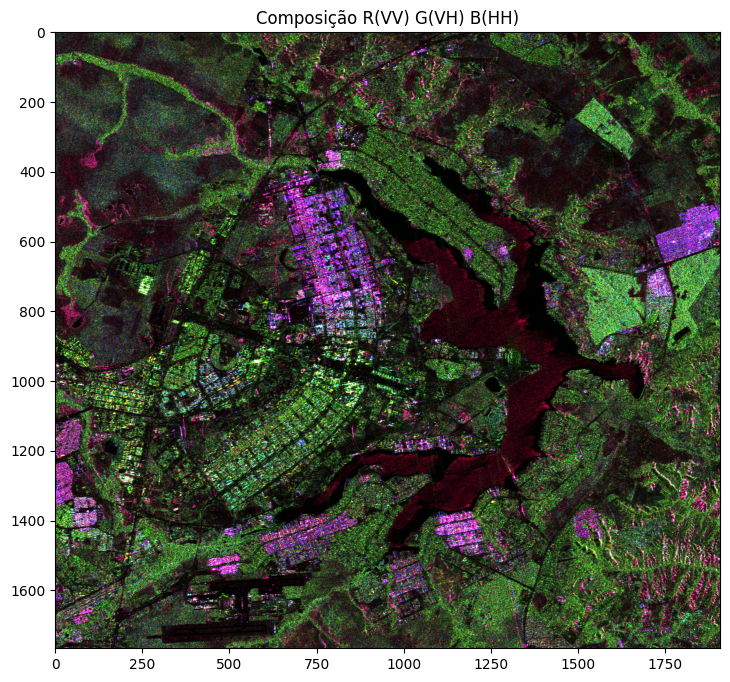

In [ ]:
#visualização composição colorido com strech
imshow(stack, bands=(0,1,3), figsize=(12,8), title="Composição R(VV) G(VH) B(HH)",
       stretch=(0.02, 0.98))

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.010177710093557835, 0.7235181331634521]
    G: [0.010177710093557835, 0.7235181331634521]
    B: [0.010177710093557835, 0.7235181331634521]

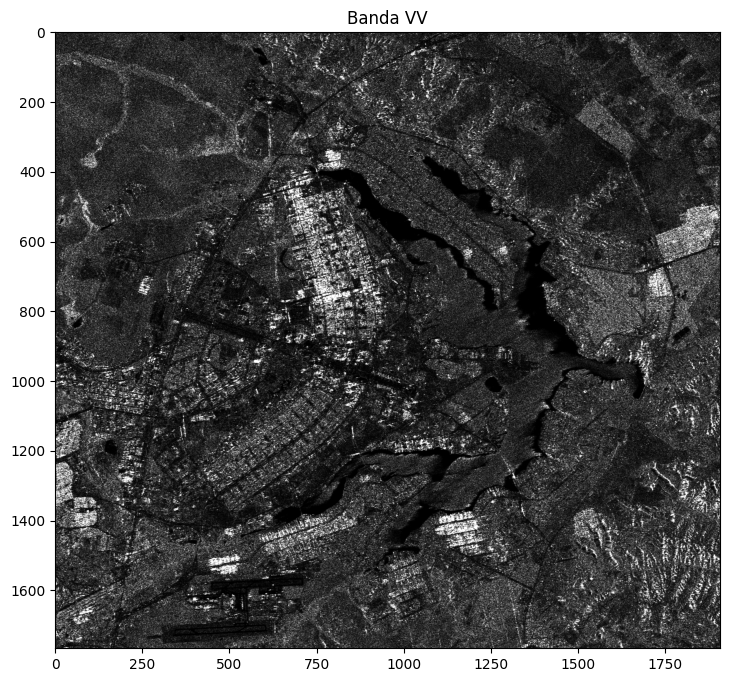

In [ ]:
#visualização somente uma banda/polarização por vez
#[:,:,0] significa todas as linhas, todas as colunas, e a banda especifica
#imshow nao permite plotar as 4 individuais juntas de forma bacana
imshow(stack[:,:,0], figsize=(12,8), title="Banda VV",
       stretch=(0.02, 0.98))

In [ ]:
#expansao(stack,5,95) para outro stretch ao inves de 2 e 98 como abaixo
#expansao(stack) ele usa o default definido abaixo 2 e 98 para o stretch

In [ ]:
# Função de expansão do histograma
def expansao(img, percent_ini=2, percent_fim=98):
  s = np.zeros_like(img)
  x,y = 0, 255 # para reescalonar os valores neste intervalo
  w = np.percentile(img, percent_ini)
  z = np.percentile(img, percent_fim)
  fun = x + (img-w) * (y-x) / (z-w)
  fun[fun<x] = x
  fun[fun>y] = y
  s = fun
  return s



In [ ]:
stack.shape

(1767, 1909, 4)

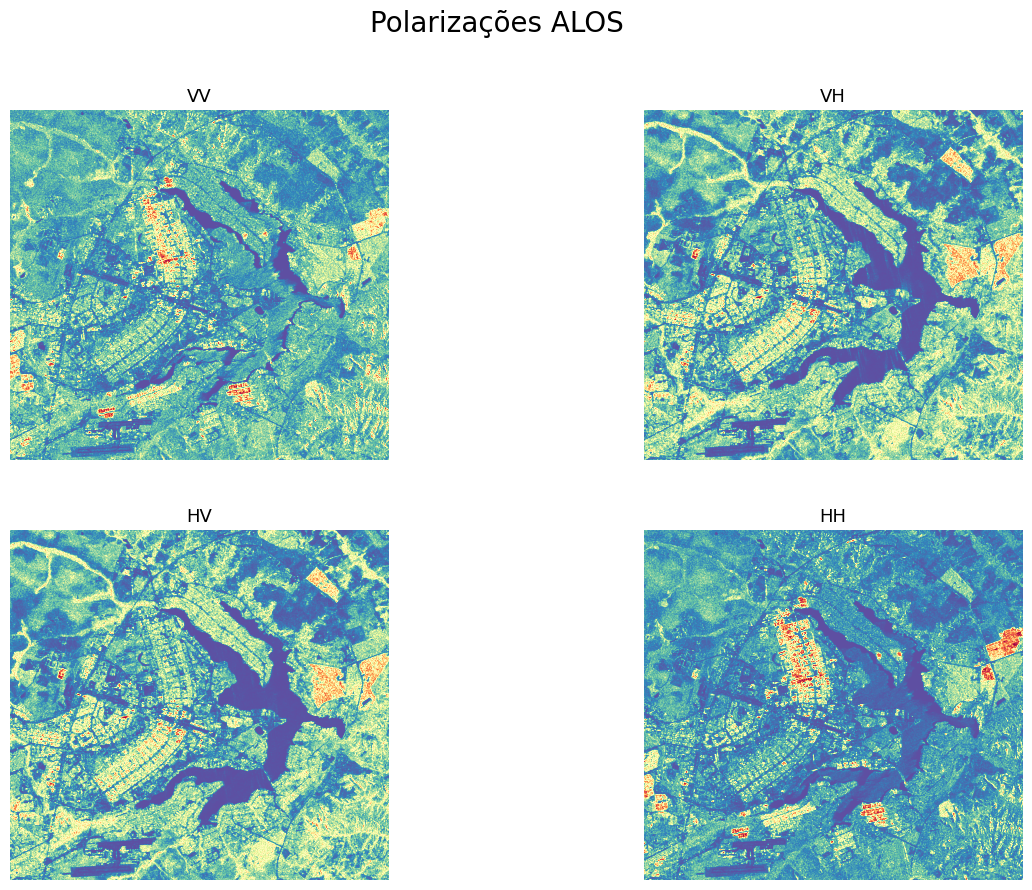

In [ ]:
#visualizando polarizações separadas
# consultar color brewer para ver paletas de cores
# cmap ="RdYlBu_r" o r no final inverte a palheta

fig, axes= plt.subplots(2,2, figsize=(15, 10), sharex= "all", sharey="all")
fig.suptitle("Polarizações ALOS", fontsize=20)
axes = axes.ravel()

pol = ["VV", "VH", "HV", "HH"] #lista para usar de subtitulos

for i in range(stack.shape[2]):
  axes[i].imshow(expansao(stack[:,:,i]), cmap ="Spectral_r" ) #imshow aqui do matplotlib não da spectral
  axes[i].set_title(pol[i],fontsize=13)
  axes[i].axis("off") # remover os valores de  numero de linhas e colunas dos eixos

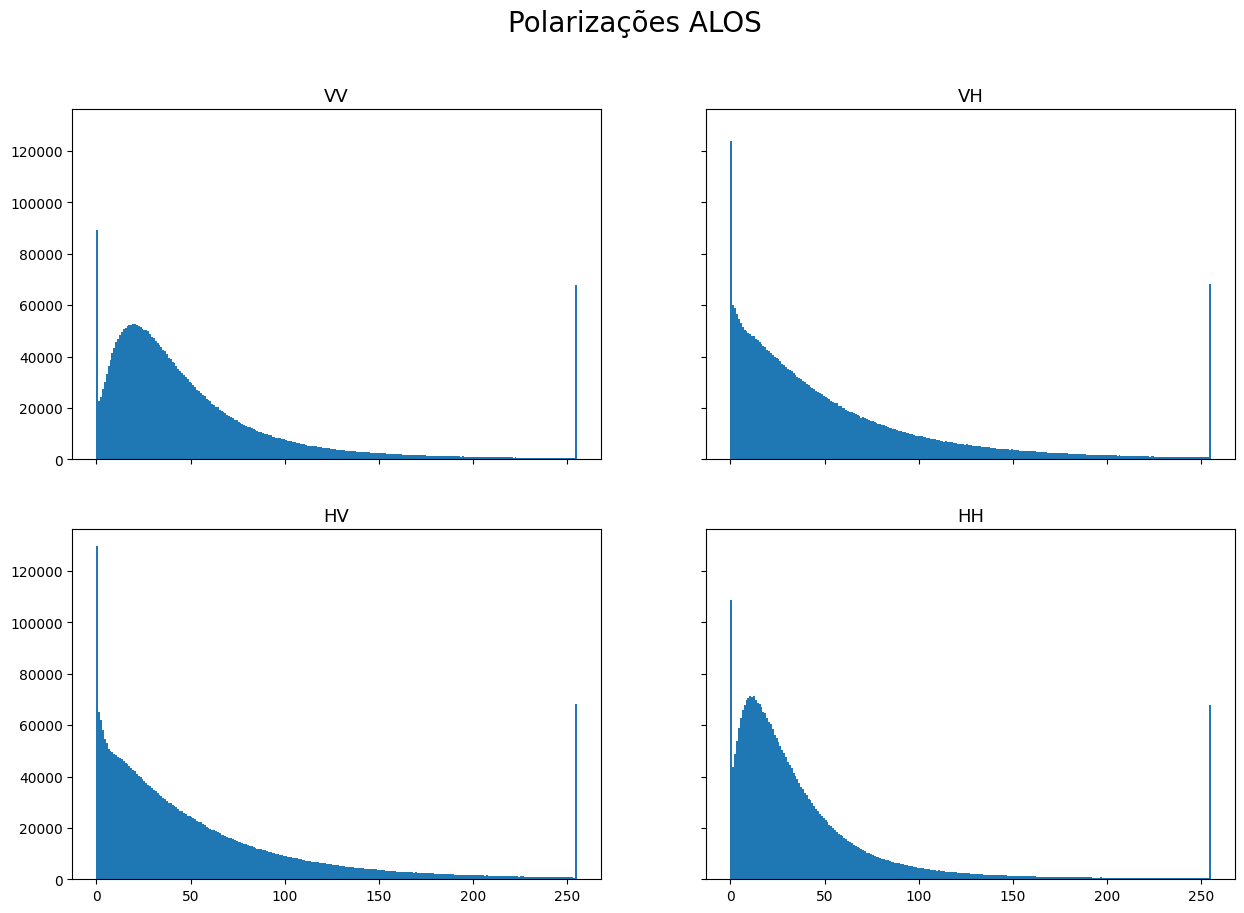

In [ ]:
#visualizando histogramas separadas
# consultar color brewer para ver paletas de cores
fig, axes= plt.subplots(2,2, figsize=(15, 10), sharex= "all", sharey="all") #share é para todos os graficos terem a mesma amplitude nos eixos
fig.suptitle("Polarizações ALOS", fontsize=20)
axes = axes.ravel()

pol = ["VV", "VH", "HV", "HH"]

for i in range(stack.shape[2]):
  axes[i].hist(expansao(stack[:,:,i].flatten()), bins=255)# flatten transforma as duas dimensões em uma, q facilita
  axes[i].set_title(pol[i],fontsize=13)
  #axes[i].axis("off")

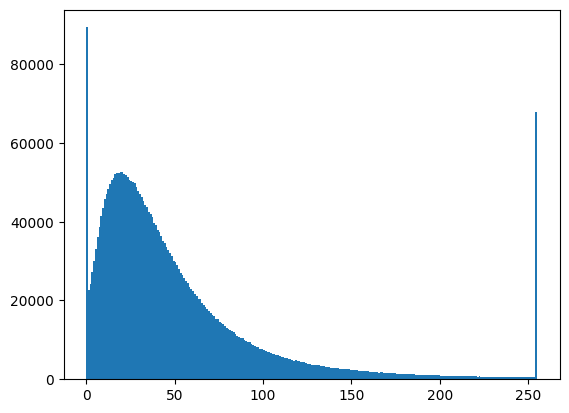

In [ ]:
plt.hist(expansao(stack[:,:,0].flatten()), bins=255) #bins para suavizar o histograma, aqui so para uma banda
plt.show() #para remover informações poluidas